# (FordGoBike)
## by (MAHMOUD NAGY)

## Investigation Overview

When are most trips taken in terms of time of day, day of the week? <br>
Compare between Customers and Subscribers (start_hrs ,duration_hrs, age, etc...) <br>
Investigate the relationship between different features.

## Dataset Overview

> Ford GoBike System Data: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [58]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [59]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike-clean.csv')
print(df.shape)
df.head()

(172936, 13)


,duration_hrs,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,start_hr
0,0.440278,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,Male,Yes,45,23
1,0.498056,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,Male,No,60,23
2,0.318611,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,312,San Jose Diridon Station,3803,Subscriber,Female,No,36,23
3,0.448611,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,127,Valencia St at 21st St,6329,Subscriber,Male,No,30,23
4,0.436111,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,127,Valencia St at 21st St,6548,Subscriber,Other,No,31,23


In [60]:
df['start_time'] = pd.to_datetime(df['start_time'])

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (User Types Count )

> Most of the users are Subscribers (about 156K users), and about 16K are customers (unsubscribed users)

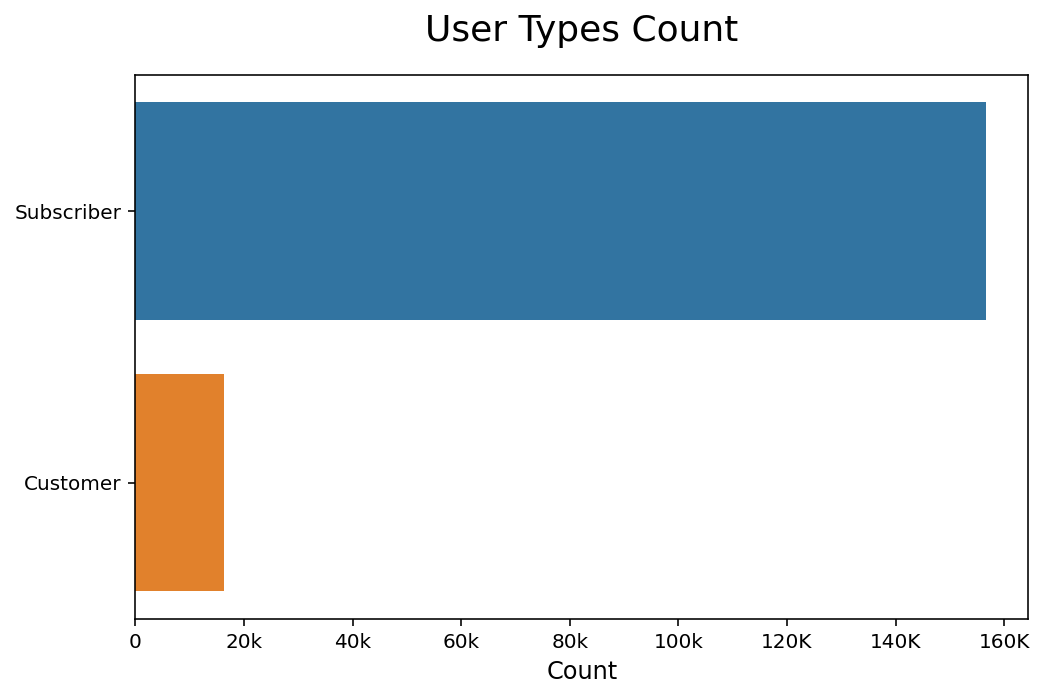

In [61]:
plt.figure(figsize=(8,5))

plt.title('User Types Count', fontsize=18, y=1.04)
sb.countplot(data=df, y='user_type')
plt.ylabel('')
plt.xlabel('Count', fontsize=12)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000],
           [0, '20k', '40k', '60k', '80k', '100k', '120K', '140K', '160K']);


## (Compare between Subscribers  and Customers trip start hrs)

> We note that we have two peaks(more obvious for the subscribers): <br>
>  - One in the normal work start time (from 7 to 9 am).
>  - The other peak in the normal work end time (from 4 to 7 pm).
  
> This is interesting and indicates that most of the users use bikes to go for work, then to come back home.


https://stackoverflow.com/questions/31074758/how-to-set-a-different-color-to-the-largest-bar-in-a-seaborn-barplot

In [62]:
# Create two dataframes: one for each user type. 
df_subscribers = df.query("user_type == 'Subscriber'")
df_customers = df.query("user_type == 'Customer'")

In [63]:
df_subscribers_hrs = df_subscribers.groupby('start_hr').size().reset_index(name='count')
df_customers_hrs = df_customers.groupby('start_hr').size().reset_index(name='count')

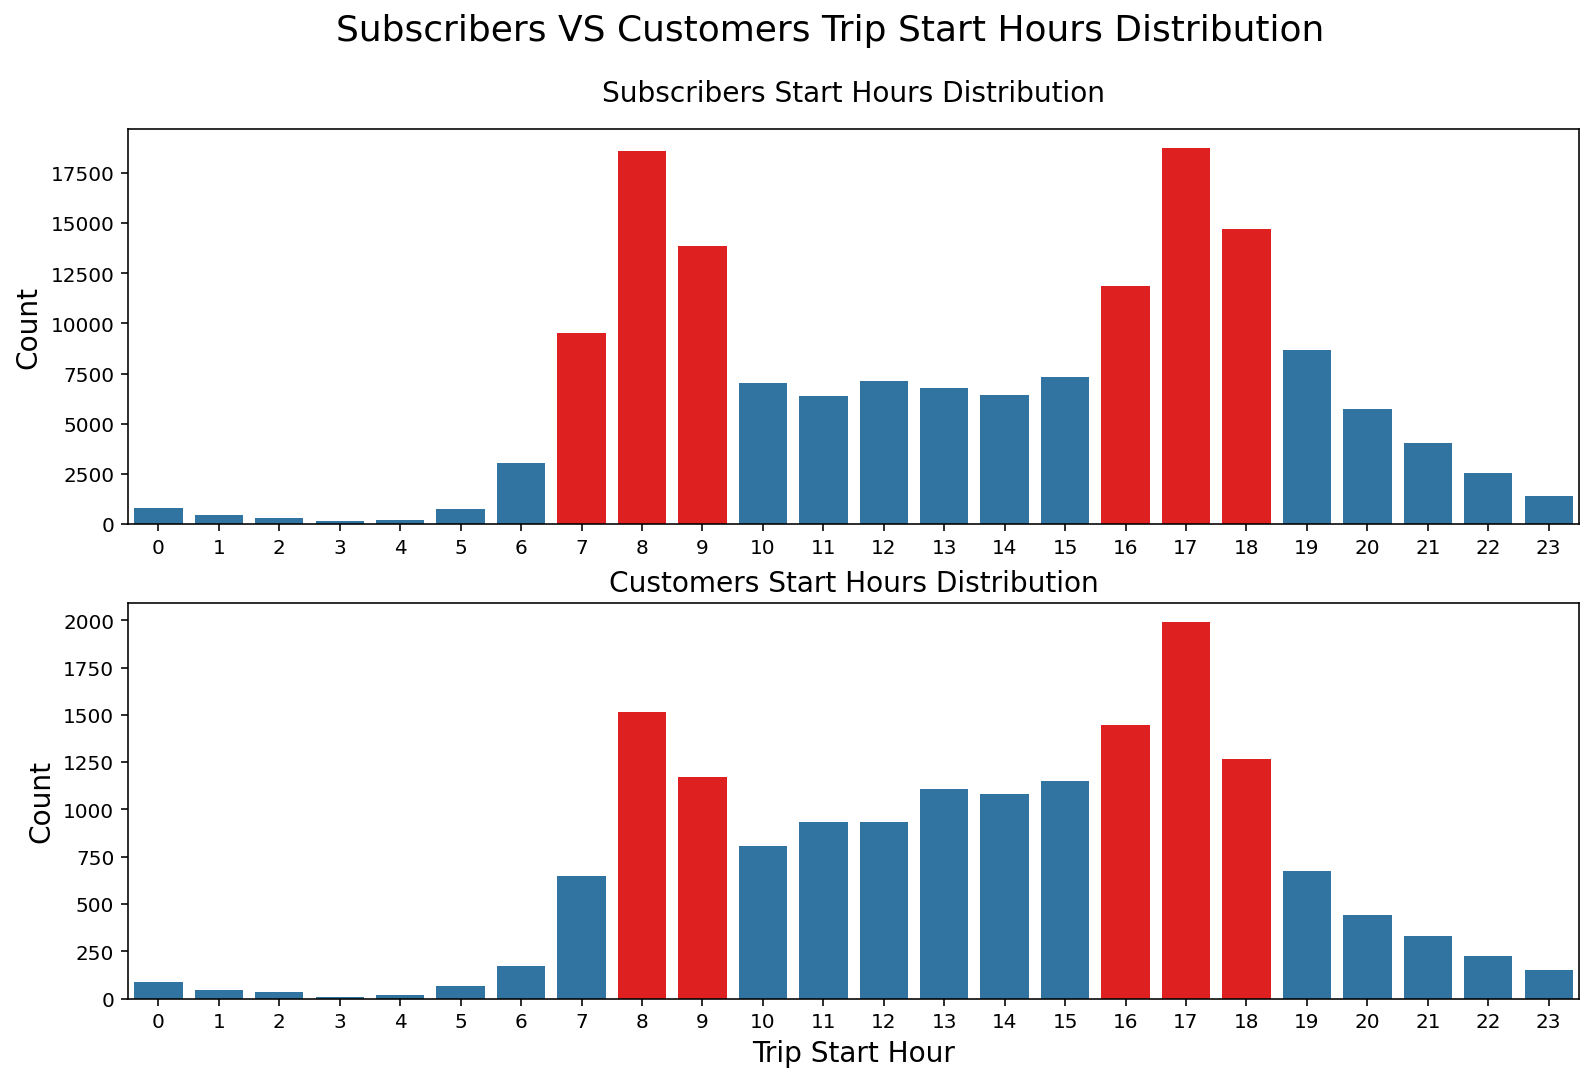

In [64]:
plt.figure(figsize=(13,8))
plt.suptitle("Subscribers VS Customers Trip Start Hours Distribution", size=18);

plt.subplot(2,1,1)

plt.title('Subscribers Start Hours Distribution', fontsize=14, y=1.04)
base_color = sb.color_palette()[0]
clrs = ['red' if (y > 9000) else base_color for y in df_subscribers_hrs['count']] 

sb.countplot(data=df_subscribers, x='start_hr', palette=clrs)
plt.ylabel('Count', fontsize=14)
plt.xlabel('');


plt.subplot(2,1,2)

plt.title('Customers Start Hours Distribution', fontsize=14)
base_color = sb.color_palette()[0]
clrs = ['red' if (y > 1170) else base_color for y in df_customers_hrs['count']] 

sb.countplot(data=df_customers, x='start_hr', palette=clrs)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Trip Start Hour', fontsize=14);


## (Subscribers  VS Customers Rides in weekdays)

> Subscribers have less rides in weekends, which supports our previous result that more subscribers are using bikes to go for their work.

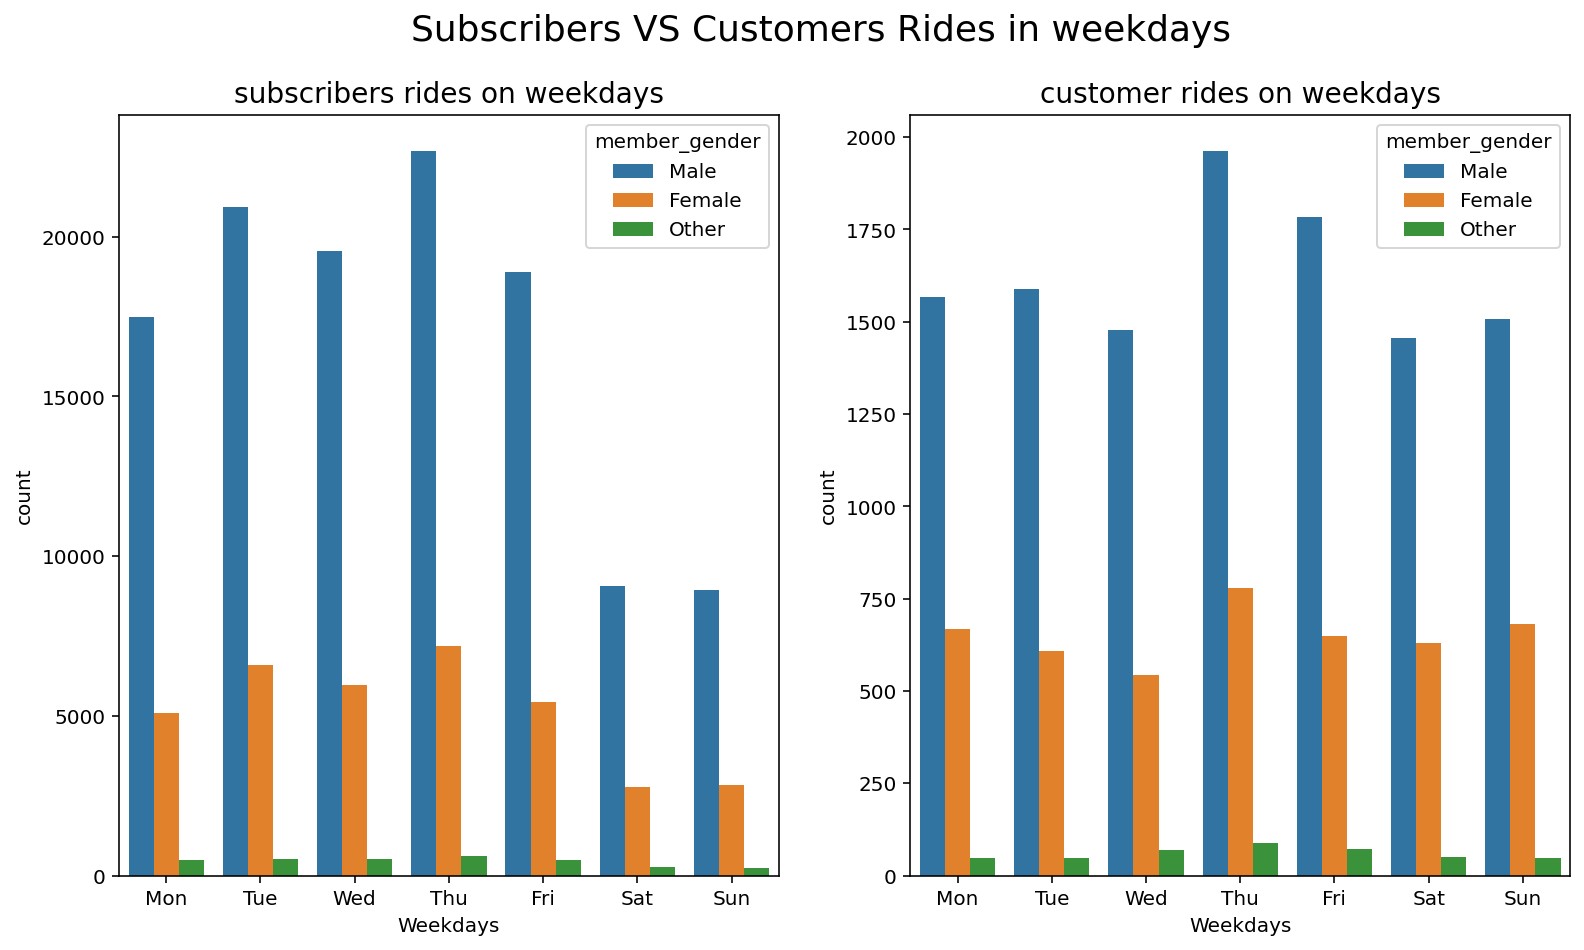

In [65]:
HU = df.member_gender
HU_order = df['member_gender'].value_counts().index
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


plt.figure(figsize=(13,7))
plt.suptitle("Subscribers VS Customers Rides in weekdays", size=18);

plt.subplot(1,2,1)
X= df_subscribers.start_time.dt.strftime('%a')
sb.countplot(data = df_subscribers, x=X, order=weekdays, hue=HU, hue_order=HU_order);
plt.title('subscribers rides on weekdays', fontsize=14);
plt.xlabel('Weekdays');

plt.subplot(1,2,2)
X= df_customers.start_time.dt.strftime('%a')
sb.countplot(data = df_customers, x=X, order=weekdays, hue=HU, hue_order=HU_order);
plt.title('customer rides on weekdays', fontsize=14);
plt.xlabel('Weekdays');


## (Relationship between Duration of the trip and the Age of the user)

> **Duaration of the rides increases as the age of the use decreases.**

> **Note:** More subscribers make shorter rides than customers. <br>
> This can be due to the difference in the purpose/nature of each user type rides: <br>
>  - Subscribers most use bikes to go for work (may be near work locations).
>  - Customers may use bikes for sports activities or other purposes.


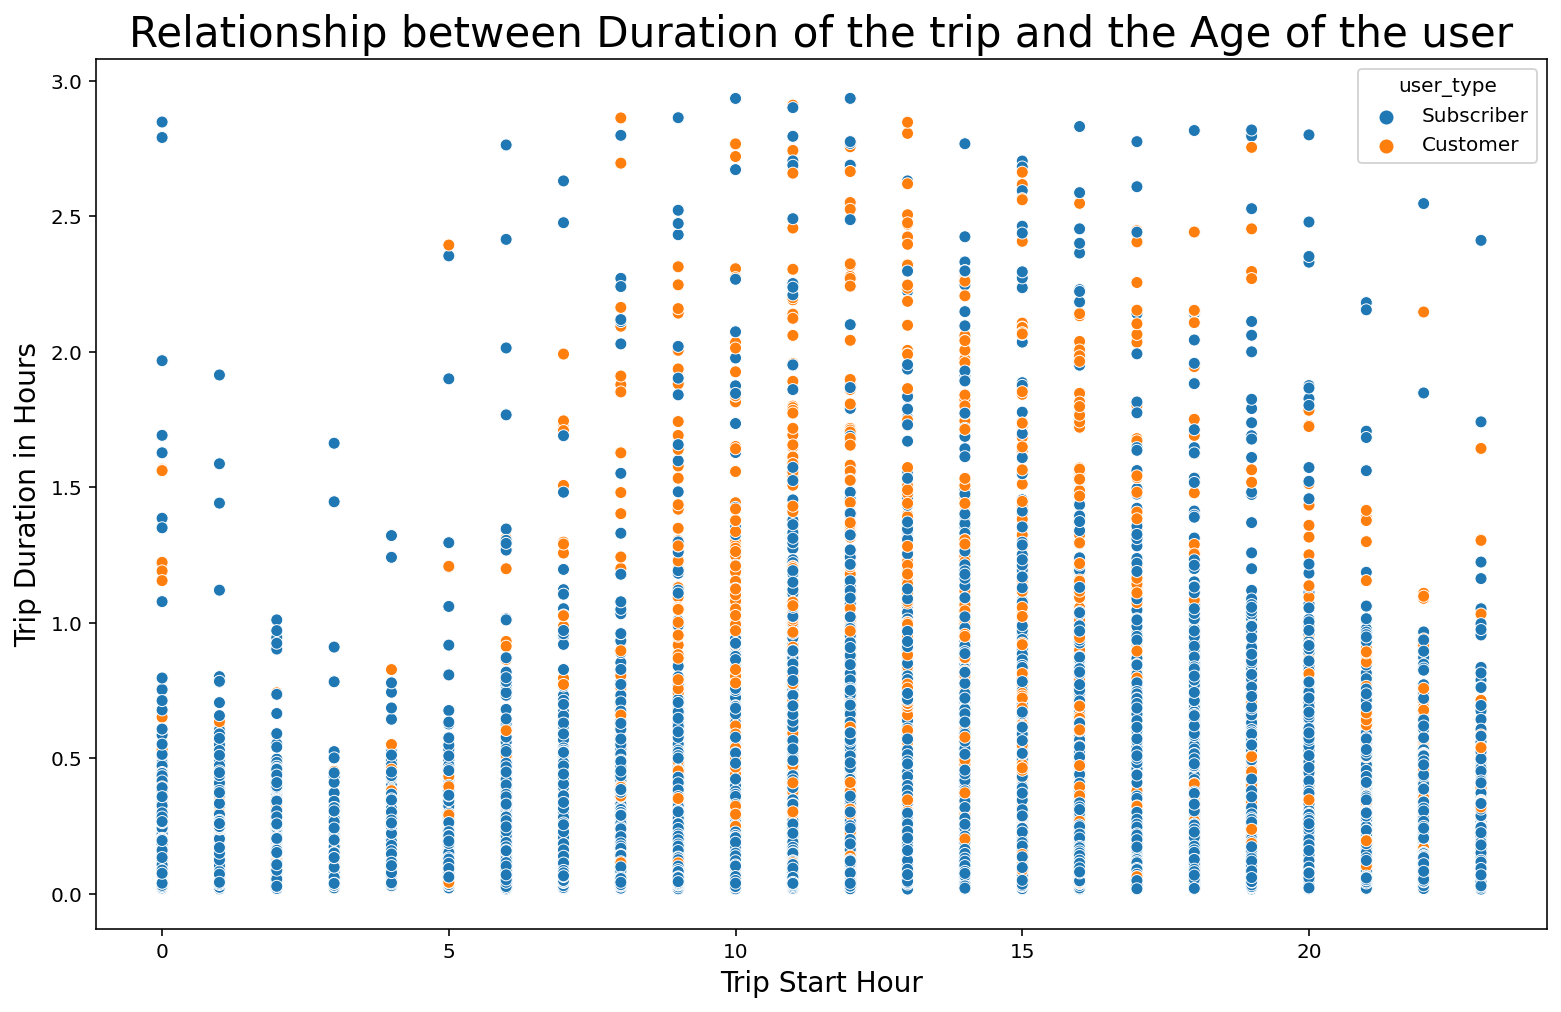

In [66]:
plt.figure(figsize=[13,8])
plt.title('Relationship between Duration of the trip and the Age of the user', fontsize=21)
sb.scatterplot(x=df.start_hr, y='duration_hrs', data=df, hue='user_type');

plt.ylabel('Trip Duration in Hours', fontsize=14)
plt.xlabel('Trip Start Hour', fontsize=14);

In [67]:
!jupyter nbconvert slide_deck_template.ipynb --TagRemovePreprocessor.remove_input_tags='{"remove_cell"}' --to slides -- no-input



[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] WARNING | pattern 'no-input' matched no files
[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1246866 bytes to slide_deck_template.slides.html


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

# THE END, Thanks For Your Time.